# German City Foundation

## TO-DO

was kann ich noch über den Wiki Scraper ziehen und visualisieren? 

Auch irgendwelche ML Sachen?

bokeh, Tableau

https://www.konsus.com/blog/timeline-templates


animation anfangs und am Ende langsamer?

Grafik, von this über this to that


In [1]:
import pandas as pd
import sqlite3
import matplotlib.image as mpimg

cnx = sqlite3.connect('second_and_better_valid-db.sqlite')

df = pd.read_sql_query("SELECT * FROM CityTable", cnx)

df.head()

,city,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden
0,Andernach,12,50.439722222222,7.4016666666667,29.860,1
1,Kempten (Allgäu),15,47.733333333333,10.316666666667,68.330,1
2,Augsburg,-15,48.371666666667,10.898333333333,292.851,0
3,Neu-Ulm,1810,48.394166666667,9.9988888888889,57.727,0
4,Putbus,1810,54.353333333333,13.471944444444,4396,1


In [2]:
#ich musste ein paar Werte, aber nicht viele, recherchieren und nachtragen

In [3]:
# convert coordinates for plotting:
df['breitengrad'] = df['breitengrad'].astype('float64')
df['laengengrad'] = df['laengengrad'].astype('float64')

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12
'''
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)'''

'\n# Where to save the figures\nPROJECT_ROOT_DIR = "."\nIMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")\n\ndef save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):\n    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)\n    print("Saving figure", fig_id)\n    if tight_layout:\n        plt.tight_layout()\n    plt.savefig(path, format=fig_extension, dpi=resolution)'

In [5]:
df.shape

(652, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 6 columns):
city                              652 non-null object
gruendungsjahr                    652 non-null int64
breitengrad                       652 non-null float64
laengengrad                       652 non-null float64
einwohnerzahl                     652 non-null object
jahr_sollte_ueberprueft_werden    652 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 30.6+ KB


In [7]:
df['einwohnerzahl'] = df['einwohnerzahl'].apply(lambda x: int(str(x).replace('.','')))

In [8]:
# Größe des Markers im Graph ist am besten im Intervall 100-500:
import numpy as np

smallest_city = df['einwohnerzahl'].min()

largest_city = df['einwohnerzahl'].max()

# scale markersize into interval [10, 500]
df['markersize'] = df['einwohnerzahl'].apply(lambda a: np.interp(a, (smallest_city, largest_city), (10, 500)))

df['markersize'].tail()

df.describe()

,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden,markersize
count,652.000000,652.000000,652.000000,6.520000e+02,652.000000,652.000000
mean,1163.322086,50.778700,10.510367,5.423633e+04,0.386503,17.317196
std,448.007921,1.534771,2.125433,1.909763e+05,0.487322,25.898921
min,-19.000000,47.545833,6.083611,2.800000e+02,0.000000,10.000000
25%,889.750000,49.831250,8.827153,6.917000e+03,0.000000,10.900065
50%,1150.000000,50.871806,10.472843,1.663600e+04,0.000000,12.218091
75%,1279.500000,51.583681,12.086736,3.905900e+04,1.000000,15.258948
max,2018.000000,54.630000,14.987222,3.613495e+06,1.000000,500.000000


In [9]:
print(df[df.markersize  >= 200])

        city  gruendungsjahr  breitengrad  laengengrad  einwohnerzahl  \
131   Berlin            1237    52.518611    13.408333        3613495   
144  München            1158    48.137222    11.575556        1456039   
335  Hamburg             832    53.550556     9.993333        1830584   

     jahr_sollte_ueberprueft_werden  markersize  
131                               0  500.000000  
144                               0  207.420278  
335                               0  258.213560  


In [10]:
def get_cities_which_excisted_in(year):
    temp_df = df[df.gruendungsjahr  <= year]
    
    # Größe dynamisch wachsen lassen:
    temp_df['markersize'] = temp_df['markersize'].apply(lambda x:  max(x * abs(year) / 2019, 10))
    
    return temp_df

#example:
get_cities_which_excisted_in(-2)

D:\programmierung\Anaconda3\envs\clean-basemap-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,city,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden,markersize
2,Augsburg,-15,48.371667,10.898333,292851,0,10
639,Koblenz,-9,50.356667,7.593889,113844,0,10
641,Speyer,-10,49.317222,8.434167,50931,0,10
644,Bonn,-12,50.733992,7.099814,325490,0,10
645,Xanten,-12,51.660278,6.450556,21614,0,10
646,Mainz,-13,50.000000,8.271111,215110,0,10
647,Worms,-14,49.633056,8.360833,83081,0,10
649,Trier,-17,49.759600,6.643900,110013,0,10
650,Köln,-19,50.938056,6.956944,1080394,0,10
651,Neuss,-16,51.198611,6.691389,153810,0,10


In [11]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "generated_images")


def plot_german_cities(dataframe, fig_id, year, tight_layout=True, fig_extension="png", resolution=100):
    
    ax = dataframe.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=dataframe["markersize"],
                                label='population', figsize=(12,8))

    # Jeweils die zehn "größten" (berechnet an der markersize) Städte in diesem Frame markieren
    largest_cities_in_this_year = dataframe.nlargest(10, 'markersize')
    
    # show actual year:
    ax.annotate(f"Year: {year}", ( 7., 54.5), family='sans-serif', fontsize=14, color='darkslategrey')
    
    for index, row in largest_cities_in_this_year.iterrows():
        #print(row['city'], row['markersize'])
        ax.annotate(row['city'], ( row['laengengrad'] + 0.1, row['breitengrad']), family='sans-serif', fontsize=14)
    
    
    #plt.axis('scaled')
    plt.axes().set_aspect('equal', 'datalim')
    plt.imshow(mpimg.imread('./img/umrisskarte-deutschland.png'), extent=[5.8652753, 15.0395564, 47.4809718, 55.0511637], alpha=0.5,
               cmap=plt.get_cmap("jet"))
    path = os.path.join(IMAGES_PATH, fig_id.zfill(4) + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

-19
Saving figure 1


D:\programmierung\Anaconda3\envs\clean-basemap-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


2003
Saving figure 2


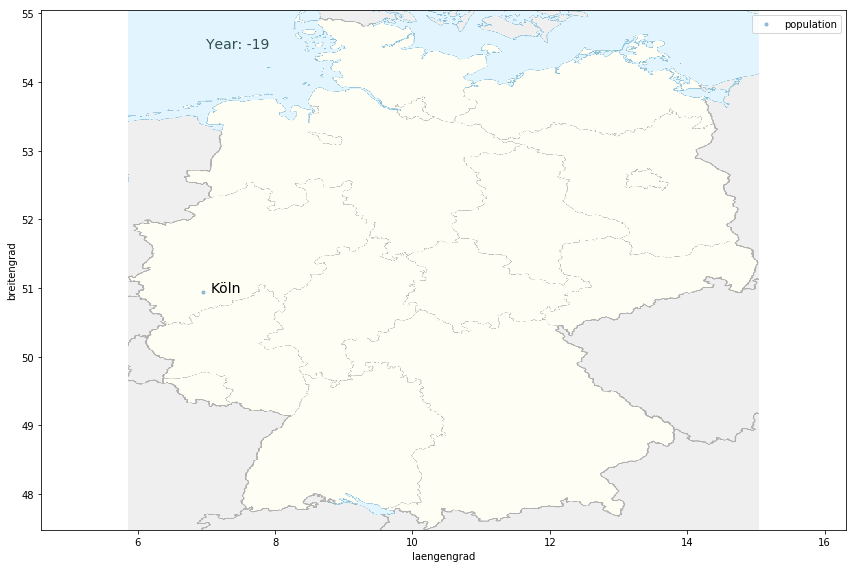

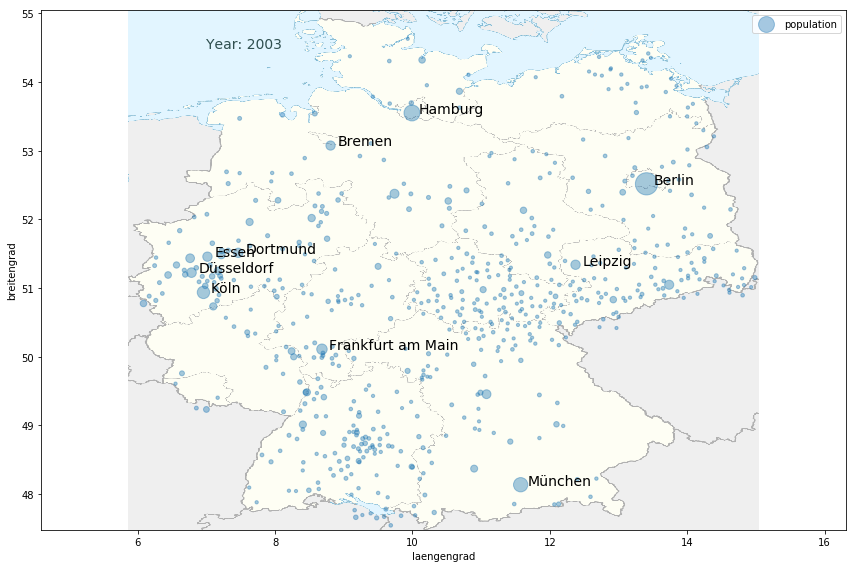

In [13]:
#%%capture
# this instruction disables plotting all images in this notebook cell
# see: https://stackoverflow.com/questions/18717877/prevent-plot-from-showing-in-jupyter-notebook

amount_of_cities = df.shape[0]

earliest_year = df['gruendungsjahr'].min()

counter = 1

#for year in range(earliest_year, 2019, 10):
for year in [-19, 2003]: # for debugging
    print(year)
    dataframe_to_plot = get_cities_which_excisted_in(year)
    plot_german_cities(dataframe_to_plot, str(counter), year)
    counter += 1
    #save_german_cities(dataframe_to_plot, year)
    #print(dataframe_to_plot)

In [32]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "generated_images")

images = []
##
filenames = sorted((fn for fn in os.listdir(IMAGES_PATH) if fn.endswith('.png')))
#['animationframa.png', 'animationframb.png', 'animationframc.png', ...] "
#print(filenames)
#images = [Image.open(fn) for fn in file_names]
##
for filename in filenames:
    images.append(imageio.imread(os.path.join(PROJECT_ROOT_DIR, "generated_images")+'\\' + filename))
imageio.mimsave(os.path.join(PROJECT_ROOT_DIR,'animation\\')+'animation.gif', images, duration=0.2)


D:\programmierung\Anaconda3\envs\clean-basemap-env\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
D:\programmierung\Anaconda3\envs\clean-basemap-env\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


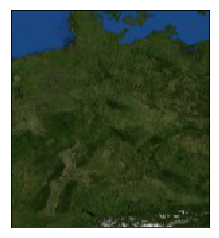

In [16]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=47.1,urcrnrlat=55.2, llcrnrlon=5.5,urcrnrlon=15.3, resolution='l')

m.bluemarble()
# m.etopo()

4955924.6594


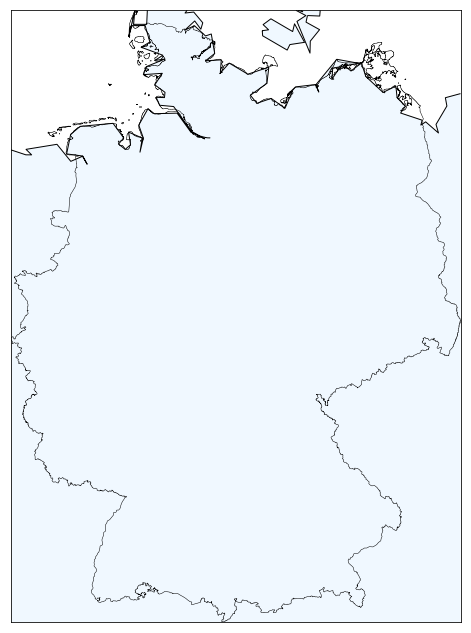

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20,10))  # predefined figure size, change to your liking. 
# But doesn't matter if you save to any vector graphics format though (e.g. pdf)
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# These coordinates form the bounding box of Germany
bot, top, left, right = 5.87, 15.04, 47.26, 55.06 # just to zoom in to only Germany
map = Basemap(projection='merc', resolution='l',
    llcrnrlat=left,
    llcrnrlon=bot,
    urcrnrlat=right,
    urcrnrlon=top)
map.readshapefile('./gadm36_DEU_shp/gadm36_DEU_0', 'rds', drawbounds=True)  # plots the state boundaries, read explanation below code
map.drawcoastlines()
map.fillcontinents(color='#f0f8ff')

long1 = np.array([ 13.404954,  11.581981,   9.993682,   8.682127,   6.960279,
6.773456,   9.182932,  12.373075,  13.737262,  11.07675 ,
7.465298,   7.011555,  12.099147,   9.73201 ,   7.628279,
8.801694,  10.52677 ,   8.466039,   8.239761,  10.89779 ,
8.403653,   8.532471,   7.098207,   7.216236,   9.987608,
7.626135,  11.627624,   6.852038,  10.686559,   8.047179,
8.247253,   6.083887,   7.588996,   9.953355,  10.122765])

lat1 = np.array([ 52.520007,  48.135125,  53.551085,  50.110922,  50.937531,
51.227741,  48.775846,  51.339695,  51.050409,  49.45203 ,
51.513587,  51.455643,  54.092441,  52.375892,  51.36591 ,
53.079296,  52.268874,  49.487459,  50.078218,  48.370545,
49.00689 ,  52.030228,  50.73743 ,  51.481845,  48.401082,
51.960665,  52.120533,  51.47512 ,  53.865467,  52.279911,
49.992862,  50.775346,  50.356943,  49.791304,  54.323293])

long1 = np.array( df['breitengrad'])
lat1 = np.array(df['laengengrad'])

x, y = map(long1, lat1)
print( x[0])
#x, y = map(laengengrad, breitengrad)
map.plot(x,y,'.')  # Use the dot-marker or use a different marker, but specify the `markersize`.

#https://stackoverflow.com/questions/28181415/decrease-size-of-markers-used-in-basemap-and-get-fullscreen